This is a copy of UCI ML Wine recognition datasets. https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

According to the source, the dataset is a result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. Hence, given a set of features, we need to determine from which of the three cultivators the wine has come from. Evidently, it is a classification problem.

In [31]:
#Attribute information:-
#Alcohol
#Malic acid
#Ash
#Alcalinity of ash
#Magnesium
#Total phenols
#Flavanoids
#Nonflavanoid phenolshttp://localhost:8889/notebooks/surbhi_hirawat_A1_wine%20Dataset.ipynb#
#Proanthocyanins
#Color intensity
#Hue
#OD280/OD315 of diluted wines
#Proline

# Problem definition:
# https://archive.ics.uci.edu/ml/datasets/Wine
# Use chemical analysis to determine the origin of wines
#In a classification context, this is a well posed problem with "well behaved" class structures. 
#A good data set for first testing of a new classifier, but not very challenging.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
import seaborn as sns
sns.set(color_codes=True)
from sklearn import metrics, preprocessing, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from math import sqrt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [33]:
%matplotlib inline

Caution: I would always advise to check with the data once and if there is no header (primarily a row that names each column), put that header = None in the read_csv() function. If you do not do this, the first training example will be loaded as the column header by the Pandas Dataframe.

The column headers aren’t very informative (you don’t know what the numbers in column 0 actually mean). Hence, it makes sense to fix this a bit: data.columns is an attribute that renames all columns to whatever we have given as a list. Note all these names have been derived from the data information section from the Wine dataset.

Nevertheless, it is great to put together the tools for making a proper machine learning model that will be used to handle typical datasets. Typically, we shall follow the following procedure:
1.	Problem Definition
2.	Collecting the data
3.	Exploratory data analysis
4.	Data cleaning and feature engineering
5.	Feature selection
6.	Modelling
7.	Testing

In [34]:
# load datasets
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
data.columns =['y', 'alcohol', 'malic_acid', 'ash', 'alcalinity', 'magnesium', 'phenols', 'flavanoids', 'nonflavanoid', 'proanthocyanins', 'color', 'hue', 'diluted', 'proline']
data.head()

,y,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,nonflavanoid,proanthocyanins,color,hue,diluted,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [35]:
data.isnull().sum() # Check for any Missing Values in the dataset

y                  0
alcohol            0
malic_acid         0
ash                0
alcalinity         0
magnesium          0
phenols            0
flavanoids         0
nonflavanoid       0
proanthocyanins    0
color              0
hue                0
diluted            0
proline            0
dtype: int64

In [36]:

import pandas_profiling as pp

pp.ProfileReport(data) #to display the report

ModuleNotFoundError: No module named 'pandas_profiling'

In [37]:
## Shape
data.shape

(178, 14)

In [38]:
## List the unique assignment groups
data["y"].unique()
print("Number of unique assignment groups - ", data["y"].nunique())

Number of unique assignment groups -  3


In [39]:
## Duplicates 
data[data.duplicated()]

,y,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,nonflavanoid,proanthocyanins,color,hue,diluted,proline


In [40]:
data.describe() # Stats for the data

,y,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,nonflavanoid,proanthocyanins,color,hue,diluted,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Observe this carefully. The mean and standard deviations of proline is much larger than those of other features. This implies the features are on different scales.

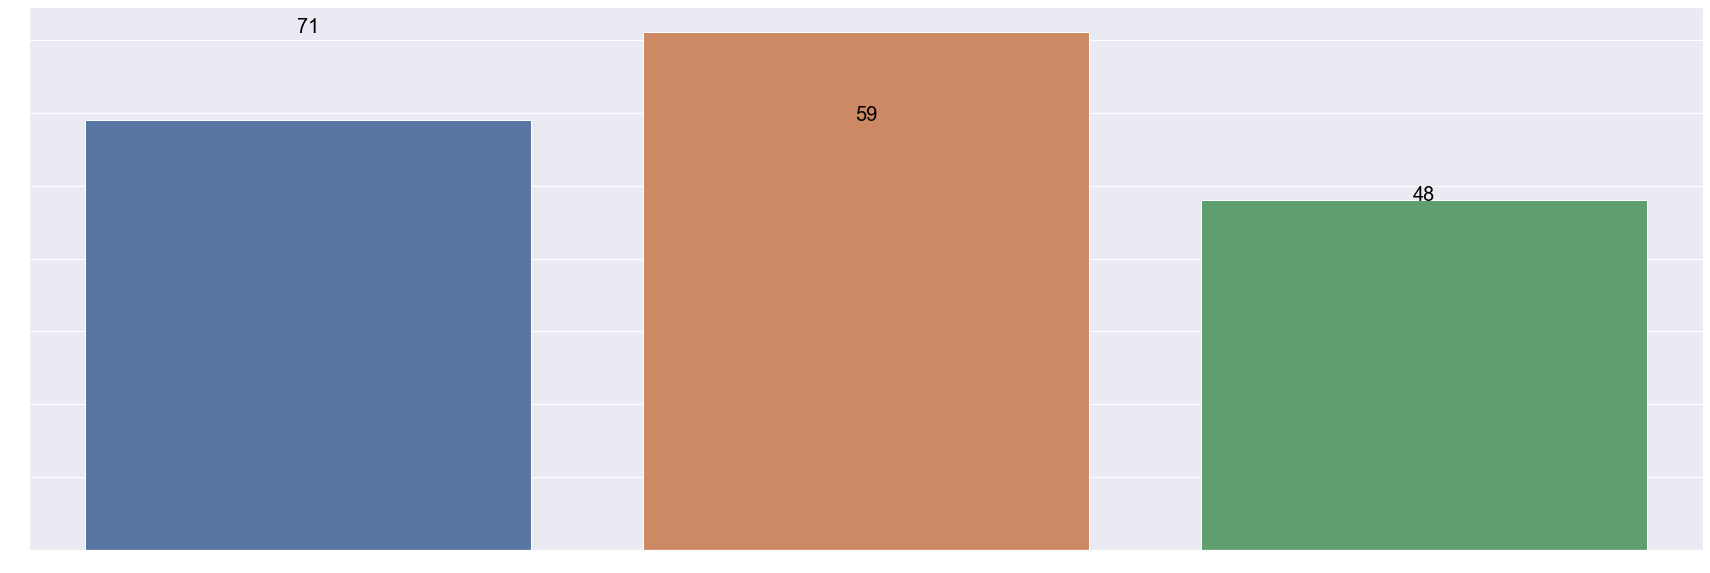

In [41]:
assgn = data['y'].value_counts() # Number of different cultivators in each group
plt.figure(figsize=(30,10))
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
cntplot = sns.barplot(x=assgn.index,y=assgn.values)
cntplot.set_xticklabels(cntplot.get_xticklabels(), rotation=90, ha="right")
for i in range(len(assgn)):
  cntplot.text(i, assgn.values[i], assgn.values[i], color='black', ha='center', fontsize=20)
plt.show()

## BOXPLOT##

<AxesSubplot:xlabel='color'>

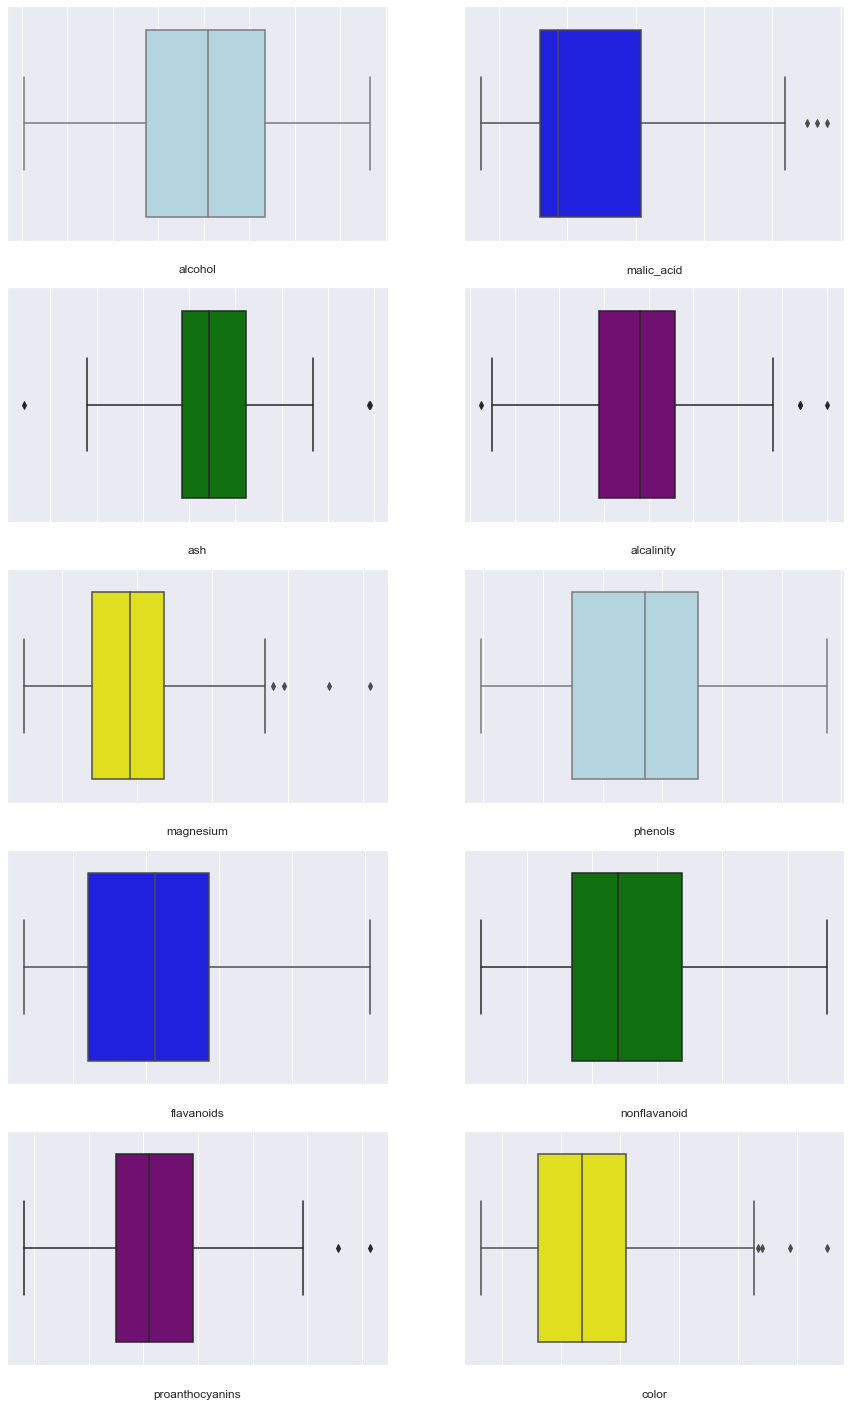

In [42]:
plt.figure(figsize= (15,25))
plt.subplot(5,2,1)
sns.boxplot(x= data.alcohol, color='lightblue')

plt.subplot(5,2,2)  
sns.boxplot(x= data.malic_acid, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= data.ash, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= data.alcalinity, color='purple')

plt.subplot(5,2,5)
sns.boxplot(x= data.magnesium, color='yellow')

plt.subplot(5,2,6)
sns.boxplot(x= data.phenols, color='lightblue')

plt.subplot(5,2,7)  
sns.boxplot(x= data.flavanoids, color='blue')

plt.subplot(5,2,8)
sns.boxplot(x= data.nonflavanoid, color='green')

plt.subplot(5,2,9)
sns.boxplot(x= data.proanthocyanins, color='purple')

plt.subplot(5,2,10)
sns.boxplot(x= data.color, color='yellow')



<AxesSubplot:xlabel='proline'>

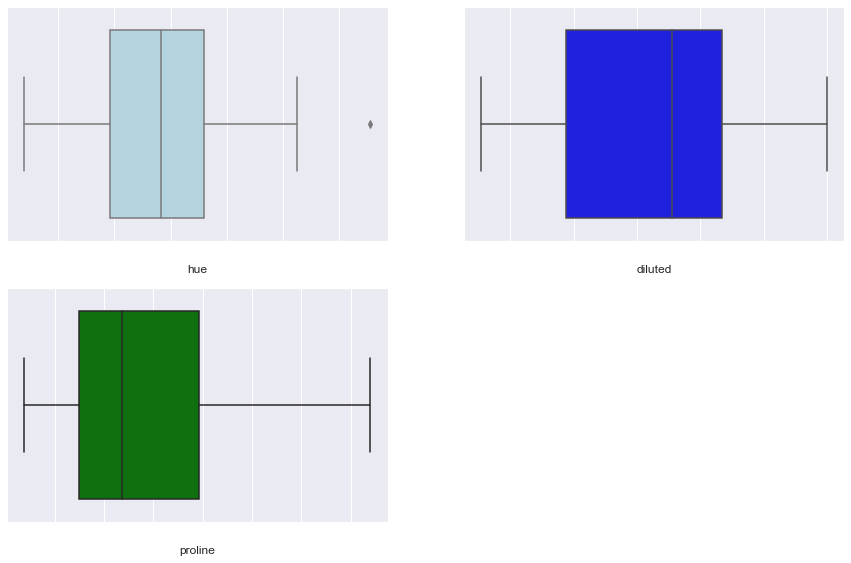

In [43]:
plt.figure(figsize= (15,25))
plt.subplot(5,2,1)
sns.boxplot(x= data.hue, color='lightblue')

plt.subplot(5,2,2)  
sns.boxplot(x= data.diluted, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= data.proline, color='green')



<AxesSubplot:>

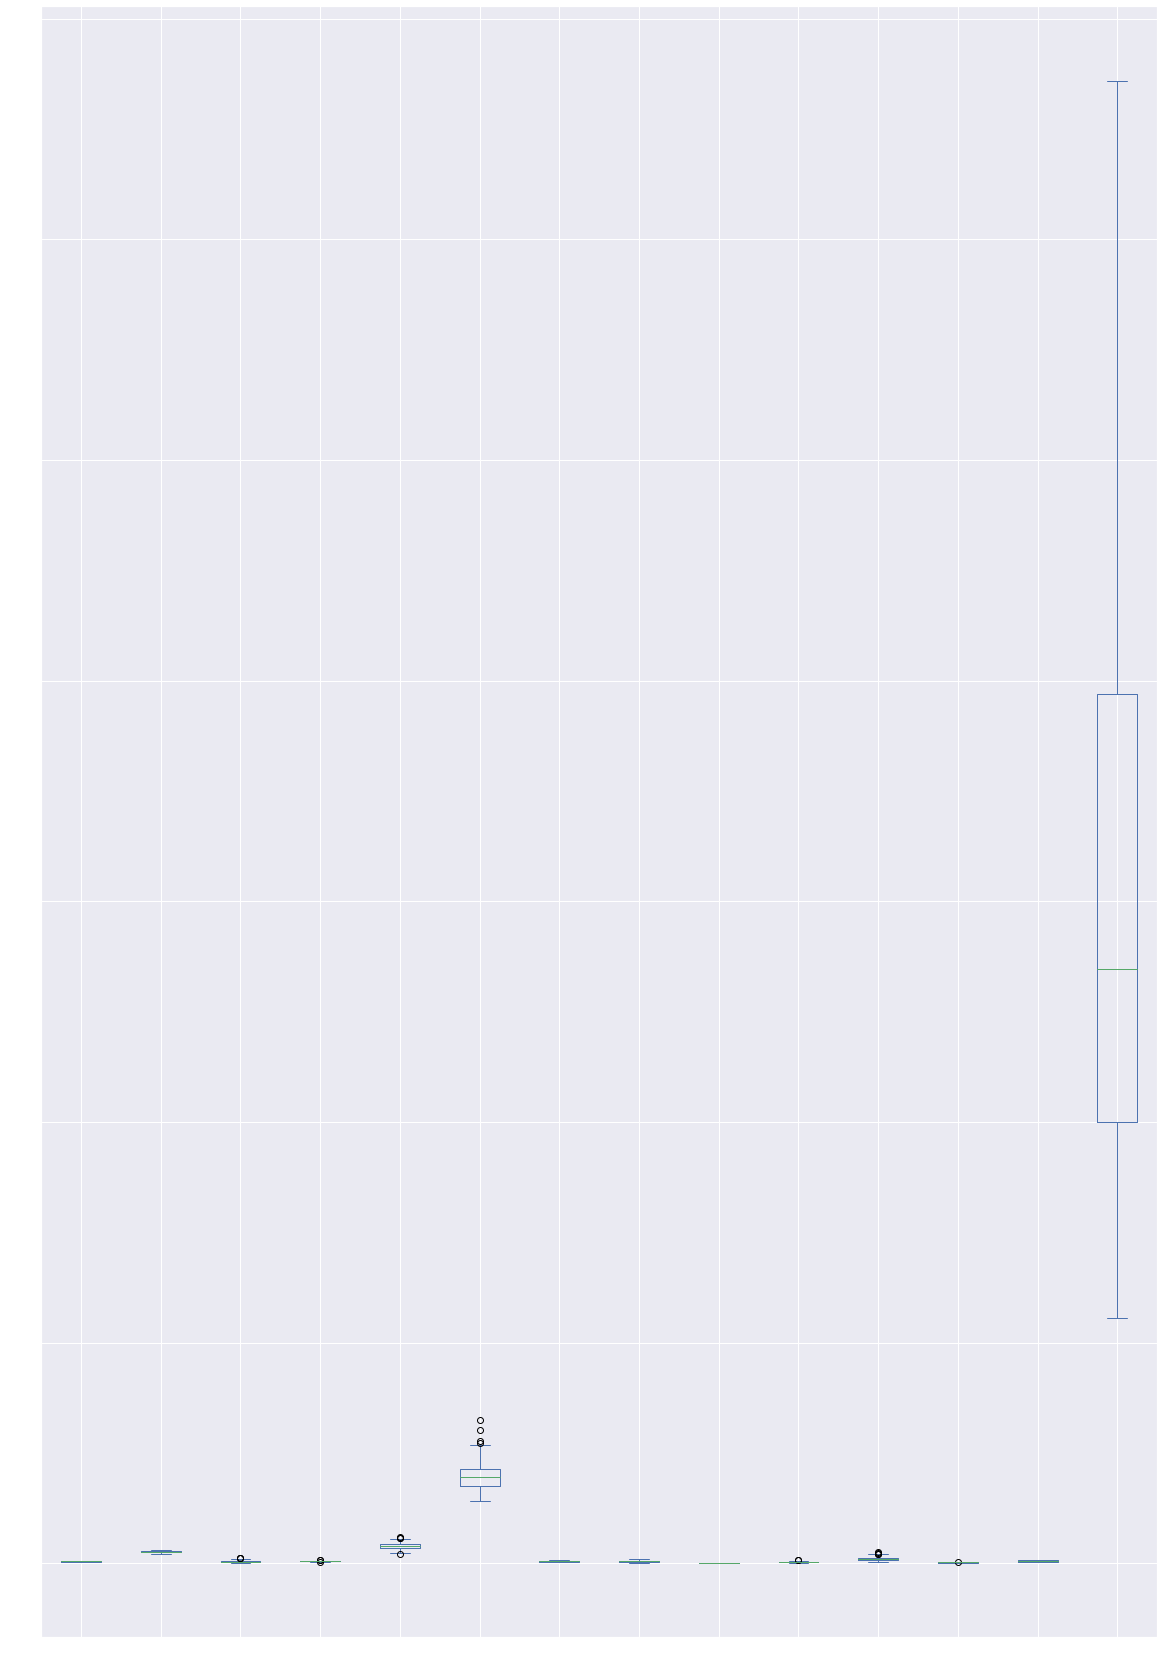

In [44]:
#Boxplot to understand spread and outliers
data.plot(kind='box', figsize=(20,30))

We also created a boxplot for each variable. In order to get a quick overview on potential outlier and distribution/spread of our variables we logged values to create the boxplot. It looks like the Flavanoids variable has the widest spread while Alcohol, Ash and Magnesium have the smallest.Furthermore, the boxplots show variables with potential outliers. The variables with outliers are Ash, Alcalinity of ash, Magnesium and Proanthocyanins

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

<AxesSubplot:xlabel='proline', ylabel='Density'>

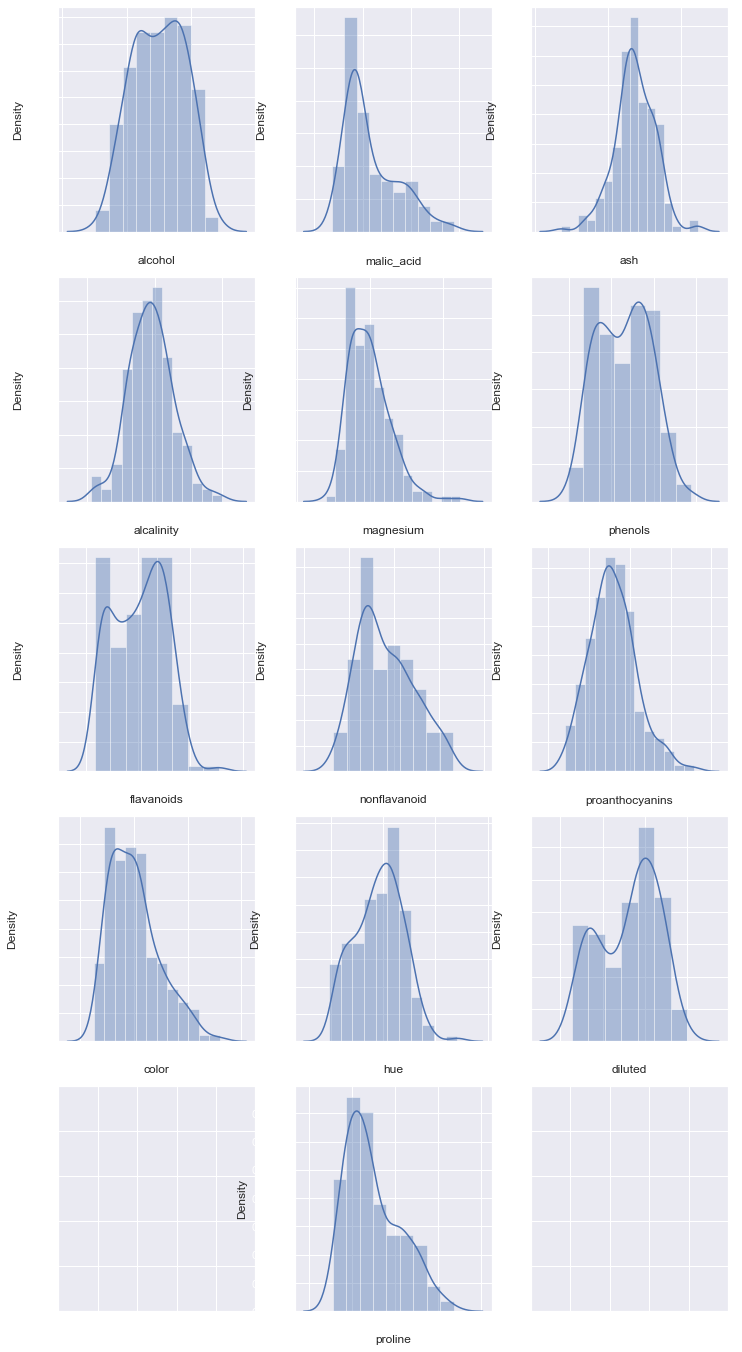

In [45]:
# Distplot for the dataframe
fig, ax2 = plt.subplots(5, 3, figsize=(12, 24))
sns.distplot(data['alcohol'],ax=ax2[0][0])
sns.distplot(data['malic_acid'],ax=ax2[0][1])
sns.distplot(data['ash'],ax=ax2[0][2])
sns.distplot(data['alcalinity'],ax=ax2[1][0])
sns.distplot(data['magnesium'],ax=ax2[1][1])
sns.distplot(data['phenols'],ax=ax2[1][2])
sns.distplot(data['flavanoids'],ax=ax2[2][0])
sns.distplot(data['nonflavanoid'],ax=ax2[2][1])
sns.distplot(data['proanthocyanins'],ax=ax2[2][2])
sns.distplot(data['color'],ax=ax2[3][0])
sns.distplot(data['hue'],ax=ax2[3][1])
sns.distplot(data['diluted'],ax=ax2[3][2])
sns.distplot(data['proline'],ax=ax2[4][1])

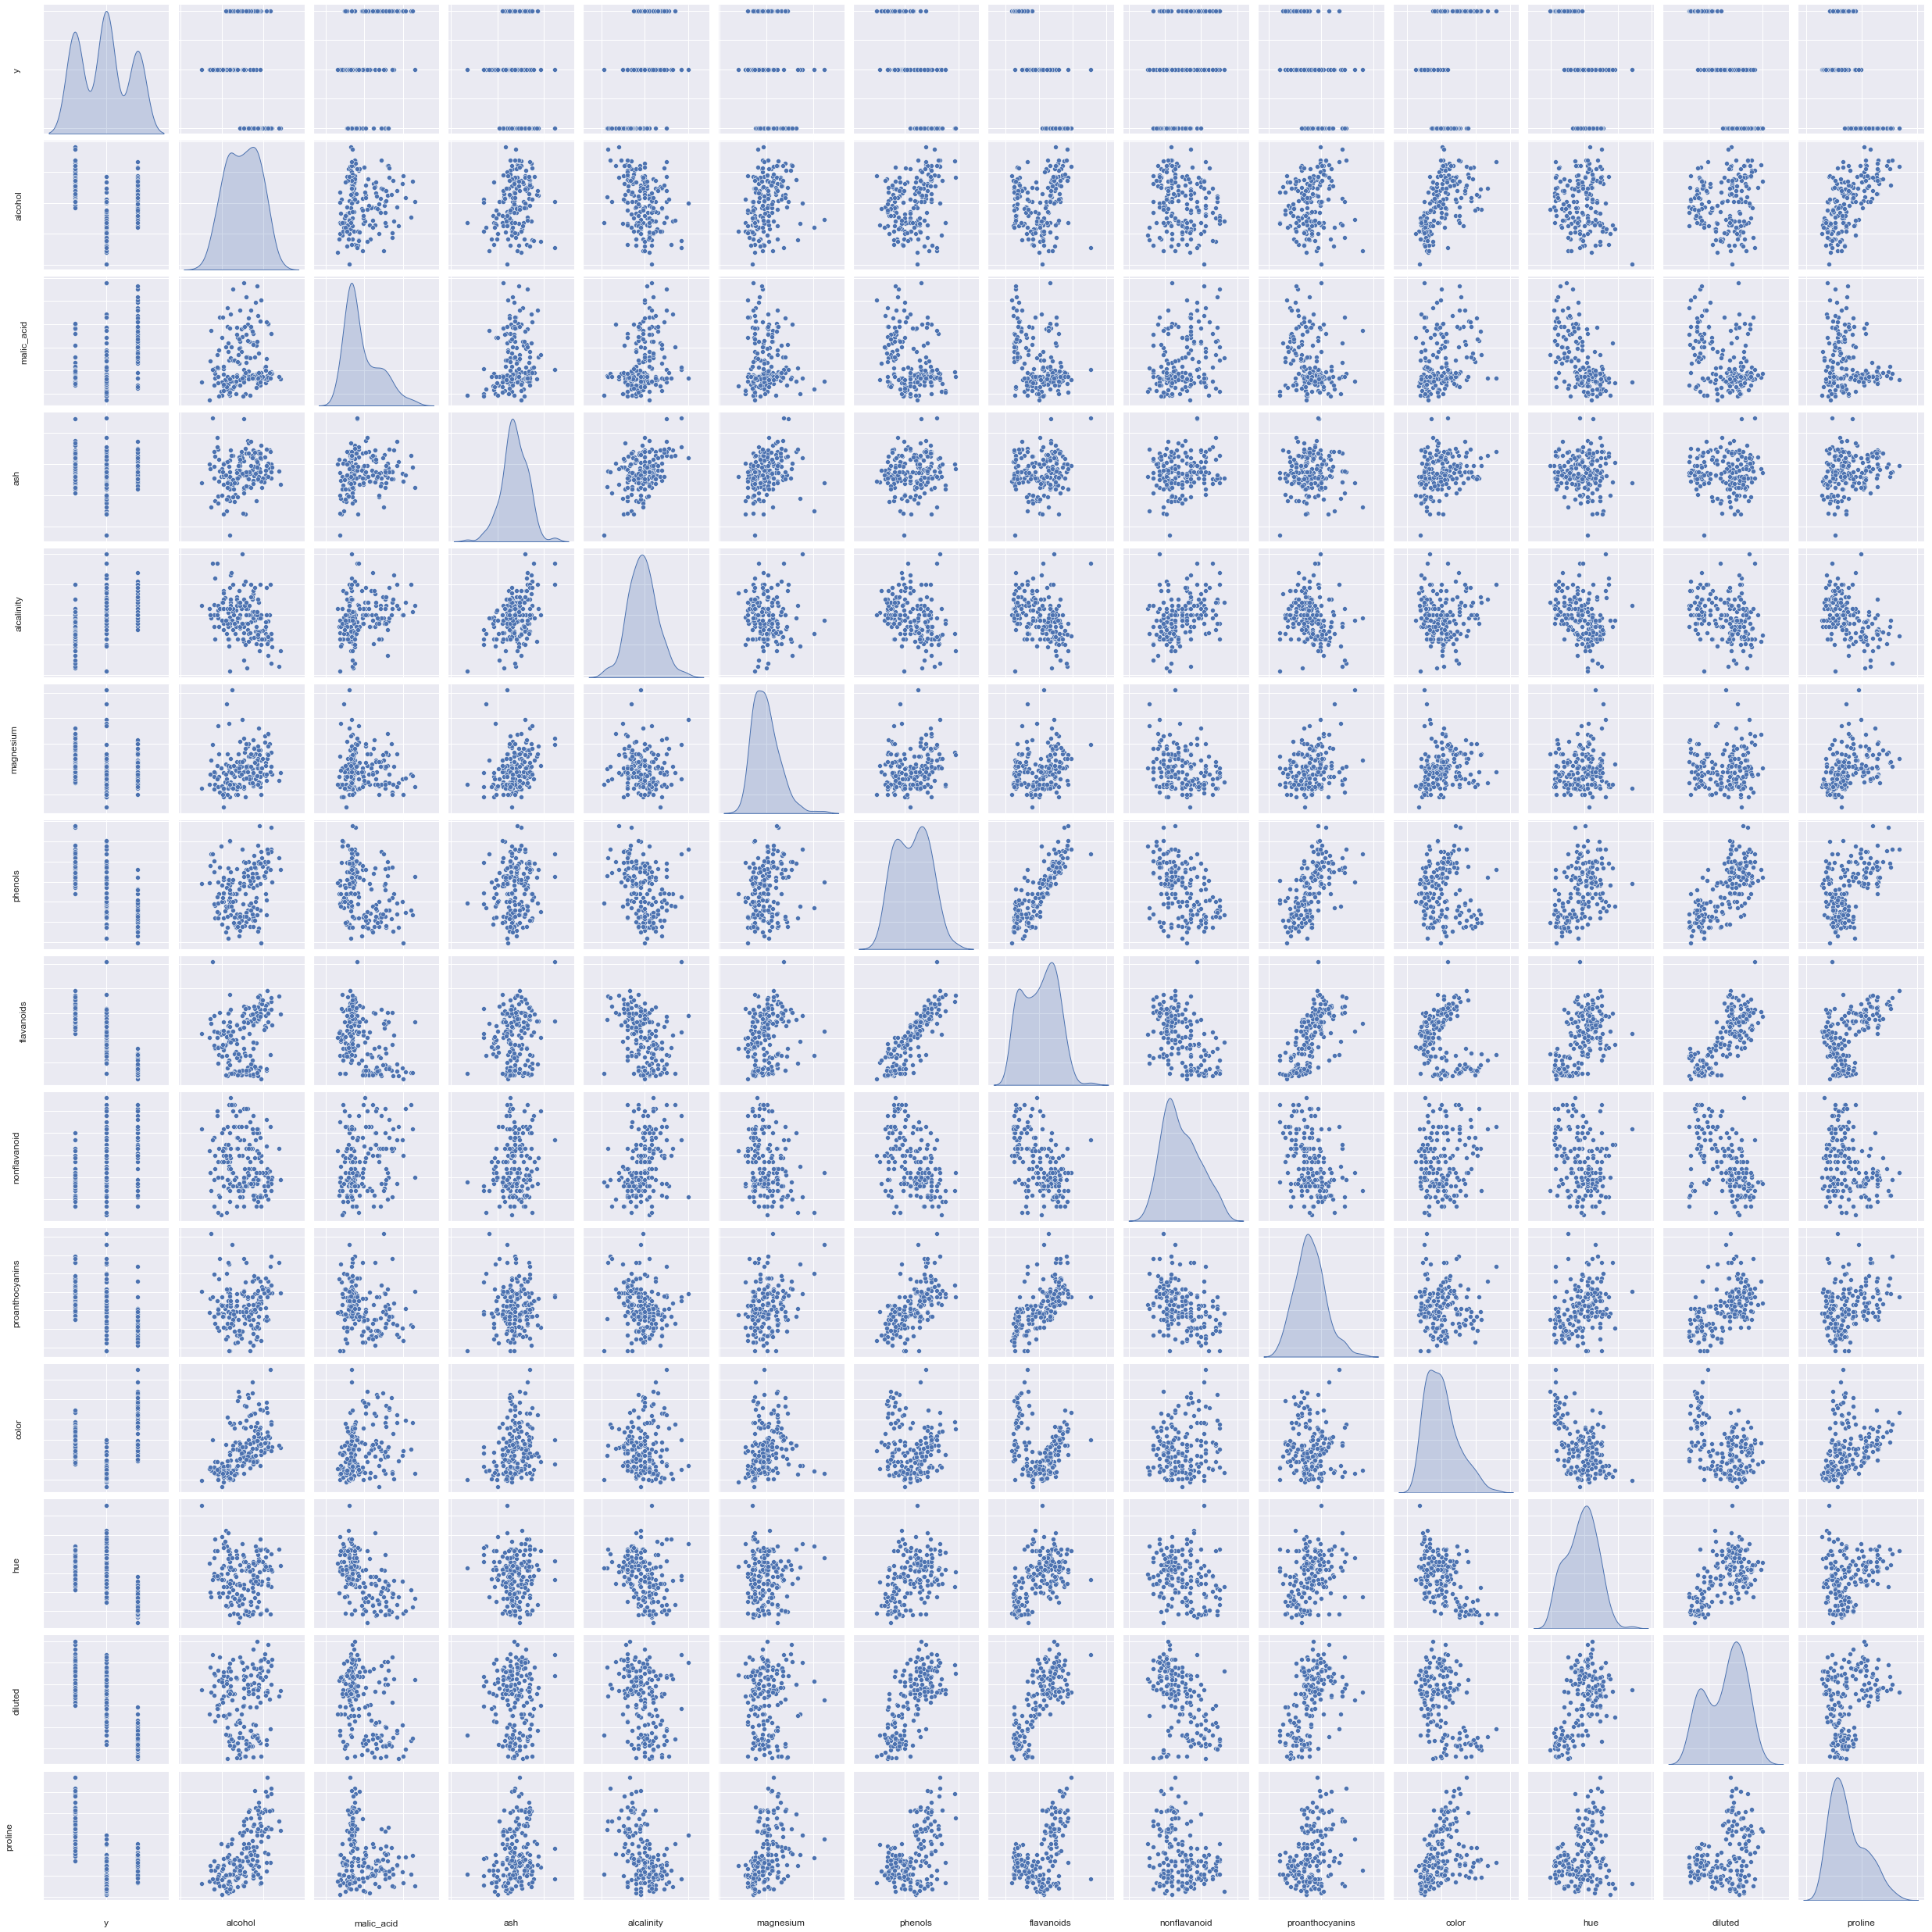

In [46]:
sns.pairplot(data,diag_kind='kde')

<AxesSubplot:>

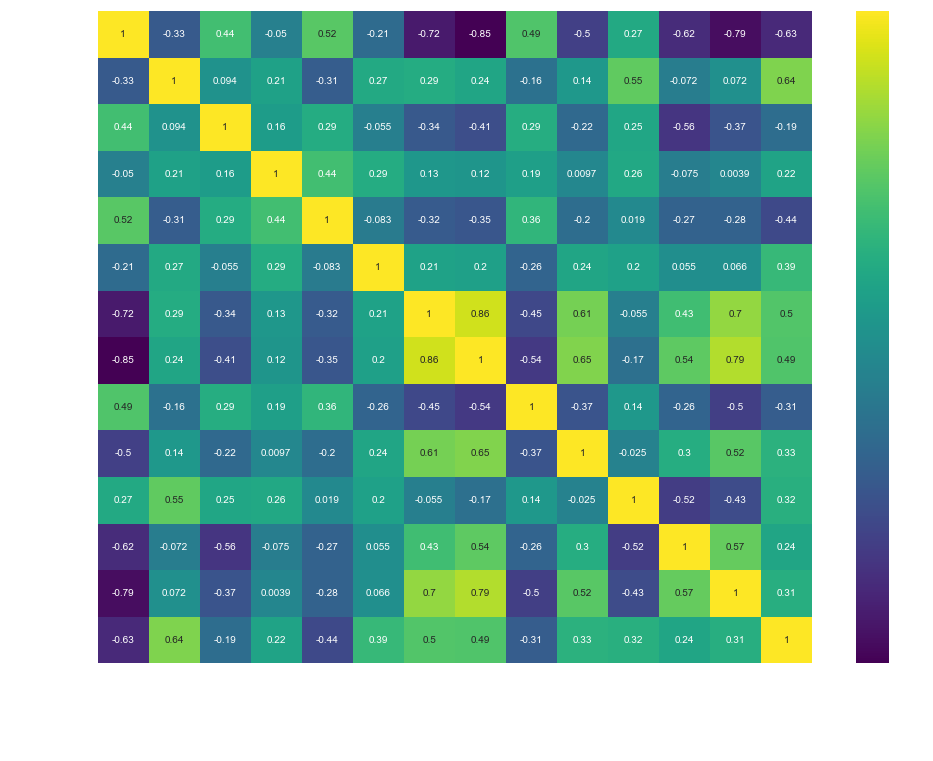

In [47]:
#It seems like the dataset is clean, no null values, all variables are numeric, so we can perform some operations
#First let's try to find some correlation
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), cmap='viridis', annot=True)

As visible in the correlation plot  the majority of the variables are weakly correlated. Exceptions are the two variables Flavonoids and Totalphenols, which are positively correlated with a number of other variables. Hue and Malic Acid have strong negative correlation with one another.



# Split data

In order to effectively train and test our model, we need to separate the data into a training set which we will feed to our model along the the training labels. Then after we have trained the model, we will test it on the 'test' data, so that we can gauge the real-world applicability of the model.

Scikit-learn has a useful functionality here with the train_test_split() method. test_size governs the proportion of data that is reserved for testing. We want to train on enough data that our model can make good predictions but we also need enough test data to determine if we've overfit the model. We'll use 20% of the data for testing.



In [48]:
things = data.values
Y_1 = things[:, 0]
X_1 = things[:, 1:13]

In [49]:
# Randomly shuffle data 
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_1, Y_1, test_size = 0.30, random_state = 1)

In [50]:
print(len(X_train1),' samples in training data\n',
      len(X_test1),' samples in test data\n', )
print(len(Y_train1),' samples in training data for target\n',
      len(Y_test1),' samples in test data for target\n', )

124  samples in training data
 54  samples in test data

124  samples in training data for target
 54  samples in test data for target



# Feature scaling/Normalization


To normalise a feature, we calculate it’s mean M and standard deviation SD. Then we subtract M from each feature value, and divide the result by SD. This causes the data to be centred around the origin…



In [51]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train1)
sc.fit(X_test1)
X_train1 = sc.transform(X_train1)
X_test1 = sc.transform(X_test1)

# Model selection/validation-NAIVE BAYES

### Model evaluation procedures###:
Training and testing on the same data

Rewards overly complex models that "overfit" the training data and won't necessarily generalize

### Train/test split ###

Split the dataset into two pieces, so that the model can be trained and tested on different data

Better estimate of out-of-sample performance, but still a "high variance" estimate

Useful due to its speed, simplicity, and flexibility

Here are many classifcation algorithms to choose through, so let's throw Naive Bayes at our problem. To do that we'll create a dict of all of the scikit-learn classifiers.The fit() function trains the model and the predict() function predicts the labels corresponding to the examples in the X_test.

In [52]:
#importing the metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr=GaussianNB()
lr.fit(X_train1,Y_train1)
pred_lr=lr.predict(X_test1) 
# performance on train data
print('Performance on training data using LR:',lr.score(X_train1,Y_train1))
# performance on test data
print('Performance on testing data using LR:',lr.score(X_test1,Y_test1))
print('MSE: ',metrics.mean_squared_error(Y_test1, pred_lr))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test1,pred_lr)))
#Evaluate the model using accuracy
lr_acc=metrics.r2_score(Y_test1,pred_lr)
print('Accuracy LR_pipeline: ',lr_acc)
mse_lr= mean_squared_error(Y_test1, pred_lr)
print(mse_lr)

Performance on training data using LR: 0.967741935483871
Performance on testing data using LR: 1.0
MSE:  0.0
RMSE:  0.0
Accuracy LR_pipeline:  1.0
0.0


##  Model evaluation metrics
### Regression problems:
Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
### Classification problems: 
Classification accuracy
There are many more metrics which we can evaluate upon


In [53]:
pred_lr1=lr.predict_proba(X_test1) # # make class predictions for the testing set

In [54]:
print('True:', Y_test1[0:25]) # Comparing the true and predicted response values
print('False:', pred_lr[0:25])

True: [3. 2. 1. 2. 1. 3. 2. 1. 3. 2. 1. 1. 2. 1. 2. 2. 3. 1. 2. 1. 1. 2. 3. 2.
 1.]
False: [3. 2. 1. 2. 1. 3. 2. 1. 3. 2. 1. 1. 2. 1. 2. 2. 3. 1. 2. 1. 1. 2. 3. 2.
 1.]


Classification accuracy is the easiest classification metric to understand
But, it does not tell you the underlying distribution of response values
We examine by calculating the null accuracy
And, it does not tell you what "types" of errors your classifier is making

## PERFORMANCE MATRICS##

I use three metrics to report performance of this model:

Accuracy score- A number that tells the fraction of examples in the X_test that were correctly classified.


Confusion matrix- A matrix that tells the number of examples in a matrix based on the predicted and the real classes. 

Classification Report- The precision, recall, and F1 score related to each classes.


In [55]:

print("Accuracy score: " + str(accuracy_score(Y_test1, pred_lr)))
cnf_matrix=confusion_matrix(Y_test1, pred_lr)
print(cnf_matrix)
print("\nClassification report: \n" + str(classification_report(Y_test1, pred_lr)))

Accuracy score: 1.0
[[23  0  0]
 [ 0 19  0]
 [ 0  0 12]]

Classification report: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        23
         2.0       1.00      1.00      1.00        19
         3.0       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


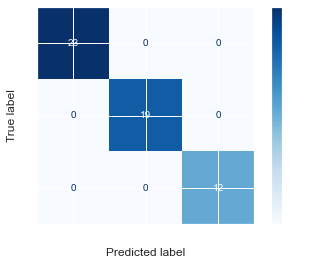

In [56]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(lr, X_test1,Y_test1,
                                 display_labels=(1,2,3),
                                 cmap=plt.cm.Blues)
plt.show()

## Sensitivity:
When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
Also known as "True Positive Rate" or "Recall"
TP / all positive
all positive = TP + FN


## Specificity: 
When the actual value is negative, how often is the prediction correct?

Something we want to maximize
How "specific" (or "selective") is the classifier in predicting positive instances?
TN / all negative
all negative = TN + FP


## False Positive Rate:
When the actual value is negative, how often is the prediction incorrect?

## Precision:
When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [57]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("SENSITIVITY : ", TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("SPECIFICITY : ", TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("PRECESION: ", PPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("FALSE POSITIVE RATE: ", FPR)
# False negative rate
FNR = FN/(TP+FN)
print("FALSE NEGATIVE RATE: ", FNR)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("ACCURACY FOR EACH CLASS: ", ACC)

SENSITIVITY :  [1. 1. 1.]
SPECIFICITY :  [1. 1. 1.]
PRECESION:  [1. 1. 1.]
FALSE POSITIVE RATE:  [0. 0. 0.]
FALSE NEGATIVE RATE:  [0. 0. 0.]
ACCURACY FOR EACH CLASS:  [1. 1. 1.]




Confusion matrix gives you a more complete picture of how your classifier is performing
Also allows you to compute various classification metrics, and these metrics can guide your model selection
Which metrics should you focus on?

Choice of metric depends on your business objective
Identify if FP or FN is more important to reduce
Choose metric with relevant variable (FP or FN in the equation)


### AUC###
AUC is the percentage of the ROC plot that is underneath the curve:

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
#roc auc score
roc_auc_score(Y_test1, pred_lr1, multi_class='ovo', average='weighted')



1.0


AUC is useful as a single number summary of classifier performance


Higher value = better classifier

If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation

AUC is useful even when there is high class imbalance (unlike classification accuracy)


# Use both of these whenever possible

## Confusion matrix advantages:

Allows you to calculate a variety of metrics

Useful for multi-class problems (more than two response classes)

### Receiver Operating Characteristic (ROC) Curves
Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

## #Answer: 
Plot the ROC curve.

Receiver Operating Characteristic (ROC)
Does not require you to set a classification threshold
Still useful when there is high class imbalance

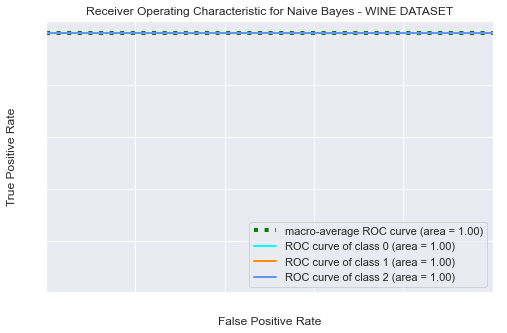

In [59]:
### MACRO
from sklearn.metrics import auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(Y_test1))[:, i], np.array(pd.get_dummies(pred_lr))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes - WINE DATASET')
plt.legend(loc="lower right")
plt.show()

#An important aspect of model evaluation is testing the data on some test data. Since we are not given any explicit test set, we make our own test test. 

#Conclusion
Although it is possible to compare various chemical attributes of wine, the data lends to a 
natural intrigue about the patterns governing the cultivation groupings. Both questioned
directions can be analysed: if the groupings are known, the question is whether certain 
attributes can consistently be attributed to wines from said area; or alternatively, if the 
attributes are known (and groupings unknown), can the wines be identified as coming from a 
certain area. 